# **영양소 EDA**

In [1]:
%pwd

'c:\\Users\\withk\\OneDrive - 동국대학교\\바탕 화면\\baf_25-2'

## **1. 데이터 불러오기**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from textwrap import fill
import seaborn as sns
from pandas.plotting import scatter_matrix

pd.set_option("display.max_rows", None)   # 행 모두 출력
pd.set_option("display.max_columns", None) # 열 모두 출력

# (윈도우) 한글 폰트 세팅
plt.rcParams["font.family"] = "Malgun Gothic"   # 맑은 고딕
plt.rcParams["axes.unicode_minus"] = False      # 마이너스 깨짐 방지

food_csv = "20250408_음식DB.csv"

In [3]:
cols = ["식품명","식품대분류명","에너지(kcal)","단백질(g)","지방(g)",
            "탄수화물(g)","나트륨(mg)","당류(g)"] # 식이섬유는 필요시 포함.

df_food = pd.read_csv(food_csv, usecols=cols, encoding="utf-8-sig")

In [4]:
# 숫자형 변환
num_cols = ["에너지(kcal)","단백질(g)","지방(g)",
            "탄수화물(g)","나트륨(mg)","당류(g)"]
for c in num_cols:
    df_food[c] = pd.to_numeric(df_food[c], errors="coerce")


#### **식품대분류명 확인 (단일메뉴만 이용)**

In [5]:
CAT = "식품대분류명"

cats_food = sorted(df_food[CAT].dropna().unique().tolist())

print(cats_food)

['곡류, 서류 제품', '과일류', '구이류', '국 및 탕류', '김치류', '나물·숙채류', '두류, 견과 및 종실류', '면 및 만두류', '밥류', '볶음류', '빵 및 과자류', '생채·무침류', '수·조·어·육류', '유제품류 및 빙과류', '음료 및 차류', '장류, 양념류', '장아찌·절임류', '전·적 및 부침류', '젓갈류', '조림류', '죽 및 스프류', '찌개 및 전골류', '찜류', '채소, 해조류', '튀김류']


##### **우리는 단일메뉴로 진행할 것이므로 음식 데이터에선 식품대분류명 중 "면 및 만두류","밥류","볶음류","구이류","국 및 탕류","죽 및 스프류",**
##### **"찌개 및 전골류","찜류","튀김류","전·적 및 부침류" 등을 포함.**

In [6]:
NAME_FULL  = "식품명"

# 1) 음식: 메인요리 카테고리만(반찬 제외)
keep_main_strict = {
    "면 및 만두류","밥류","볶음류","구이류",
    "국 및 탕류","죽 및 스프류","찌개 및 전골류",
    "찜류","튀김류","전·적 및 부침류"}
df_food_main = df_food.loc[df_food[CAT].isin(keep_main_strict)].copy()



In [7]:
print(df_food_main.head())

       식품명 식품대분류명  에너지(kcal)  단백질(g)  지방(g)  탄수화물(g)  당류(g)  나트륨(mg)
0  국밥_돼지머리     밥류        137    6.70   5.16    15.94   0.16    181.0
1  국밥_순대국밥     밥류         75    3.17   2.28    10.38   0.17    126.0
2   국밥_콩나물     밥류         52    1.45   0.24    10.93   0.00    172.0
3      기장밥     밥류        166    3.44   0.57    36.77   0.00      1.0
4       김밥     밥류        140    4.84   4.55    19.98   0.00    307.0


##### **음식명_재료명 인 형태인 데이터도 존재하기 때문에 '음식명'만을 가지고 있는 데이터만 뽑아내겠음.**

In [8]:
# 1) 괄호 제거 후 공백 정리
name_clean = (df_food_main["식품명"].astype(str)
              .str.replace(r"\([^)]*\)", "", regex=True).str.strip())

# 2) 구분자가 하나라도 있으면 '재료가 붙은 행'으로 간주
has_sep = name_clean.str.contains(r"[ _\-\u00B7·/,]")

# 3) 구분자 없는 행만 보기 (= 음식 단독 표기)
df = df_food_main.loc[~has_sep].copy()

In [9]:
print(df.shape) #(1447, 8)
print(df.info())
print(df.describe().T) 
display(df.head())
display(df.tail())

(1447, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 1447 entries, 3 to 14397
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   식품명        1447 non-null   object 
 1   식품대분류명     1447 non-null   object 
 2   에너지(kcal)  1447 non-null   int64  
 3   단백질(g)     1447 non-null   float64
 4   지방(g)      1447 non-null   float64
 5   탄수화물(g)    1447 non-null   float64
 6   당류(g)      1444 non-null   float64
 7   나트륨(mg)    1447 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 101.7+ KB
None
            count        mean         std   min      25%     50%      75%  \
에너지(kcal)  1447.0  121.541120   81.621310  3.00   61.000  114.00  160.000   
단백질(g)     1447.0    7.097554    6.714114  0.16    2.620    4.70    9.575   
지방(g)      1447.0    5.071589    5.452252  0.00    1.080    3.30    7.285   
탄수화물(g)    1447.0   11.556171   10.051938  0.00    3.345    8.67   17.950   
당류(g)      1444.0    1.474952    2

,식품명,식품대분류명,에너지(kcal),단백질(g),지방(g),탄수화물(g),당류(g),나트륨(mg)
3,기장밥,밥류,166,3.44,0.57,36.77,0.00,1.0
4,김밥,밥류,140,4.84,4.55,19.98,0.00,307.0
18,보리밥,밥류,161,2.90,0.24,36.77,2.57,4.0
19,볶음밥,밥류,183,5.56,2.76,33.97,0.00,212.0
27,비빔밥,밥류,142,6.86,4.32,18.84,0.05,232.0


,식품명,식품대분류명,에너지(kcal),단백질(g),지방(g),탄수화물(g),당류(g),나트륨(mg)
14393,임연수튀김,튀김류,372,26.5,20.12,17.18,0.02,1236.0
14394,조기튀김,튀김류,144,13.4,7.77,3.62,0.01,84.0
14395,참치강정,튀김류,353,30.3,14.12,23.55,6.87,948.0
14396,채소튀김,튀김류,101,1.3,5.28,11.65,1.45,138.0
14397,탕수어,튀김류,281,12.6,7.79,38.73,8.36,323.0


In [28]:
# '식품명' 열에서 중복된 값 확인
duplicates = df[df['식품명'].duplicated()]
print(duplicates)


               식품명     식품대분류명  에너지(kcal)  단백질(g)  지방(g)  탄수화물(g)  당류(g)  \
10816          볶음밥         밥류        193    6.92   8.38    22.50   1.79   
10822          비빔밥         밥류        142    4.47   3.81    22.50   3.04   
10834          자장밥         밥류        148    3.05   4.46    24.01   1.07   
10921          간자장    면 및 만두류        127    3.44   3.39    20.65   1.87   
10929         떡만두국    면 및 만두류         89    2.87   1.62    15.82   0.02   
10957         비빔국수    면 및 만두류        113    3.20   1.86    20.94   4.31   
10995          자장면    면 및 만두류        123    3.04   3.13    20.56   1.20   
11010          콩국수    면 및 만두류        100    4.61   3.83    11.69   0.76   
11027       쌀죽(흰죽)    죽 및 스프류         52    1.33   0.15    11.43   0.00   
11038          채소죽    죽 및 스프류         70    1.15   1.39    13.30   0.40   
11040          감자국     국 및 탕류         32    1.19   0.79     4.94   0.74   
11043           곰탕     국 및 탕류         61    6.47   1.23     6.03   0.17   
11044          김치국     국 

In [ ]:
id_cols = ["식품명","식품대분류명"]
df_1 = df_clean.copy()

def iqr_outliers_by_group(df_1, group_col, num_cols, id_cols):
    # 숫자 변환(문자/혼합 dtype 방지)
    for c in num_cols:
        df_1[c] = pd.to_numeric(df_1[c], errors="coerce")
    rows = []
    for g, sub in df_1.groupby(group_col):
        if len(sub) < 4:  # 표본 너무 작으면 스킵(사분위수 불안정)
            continue
        for c in num_cols:
            q1 = sub[c].quantile(0.25)
            q3 = sub[c].quantile(0.75)
            iqr = q3 - q1
            if not np.isfinite(iqr) or iqr == 0:
                continue
            lo  = q1 - 1.5 * iqr
            hi  = q3 + 1.5 * iqr
            mask = sub[c].notna() & ((sub[c] < lo) | (sub[c] > hi))
            if not mask.any():
                continue
            tmp = sub.loc[mask, id_cols + [c]].copy()
            tmp["var"]   = c
            tmp["value"] = tmp[c]
            tmp["Q1"]    = q1
            tmp["Q3"]    = q3
            tmp["IQR"]   = iqr
            tmp["lower"] = lo
            tmp["upper"] = hi
            # 초과 정도(양수: 상한 초과, 음수: 하한 미만) — IQR 단위
            tmp["severity_iqr_signed"] = np.where(tmp["value"] > hi,
                                                  (tmp["value"] - hi)/iqr,
                                                  (tmp["value"] - lo)/iqr)
            tmp["severity_iqr_abs"] = tmp["severity_iqr_signed"].abs()
            rows.append(tmp.drop(columns=[c]))
    if not rows:
        return pd.DataFrame(columns=id_cols + ["var","value","Q1","Q3","IQR","lower","upper",
                                               "severity_iqr_signed","severity_iqr_abs"])
    out = (pd.concat(rows, ignore_index=True)
           .sort_values(["식품대분류명","var","severity_iqr_abs","value"],
                        ascending=[True,True,False,False]))
    return out

# 3) 실행
outliers_by_cat = iqr_outliers_by_group(df_1, "식품대분류명", num_cols, id_cols)

## **2. 결측치 처리**

In [10]:
df_clean = df.copy()
df_clean.isna().sum(axis=0).sort_values() # 결측치 및 중복 데이터 확인

식품명          0
식품대분류명       0
에너지(kcal)    0
단백질(g)       0
지방(g)        0
탄수화물(g)      0
나트륨(mg)      0
당류(g)        3
dtype: int64

### **2-1. 당류 결측치 처리**

In [11]:
# 당류 비어 있는 음식
aa = df_clean[df_clean["당류(g)"].isna()][["식품명", "식품대분류명"]]
print(aa)

        식품명   식품대분류명
10832   연잎밥       밥류
10956  비빔국수  면 및 만두류
11036   참깨죽  죽 및 스프류


##### **카테고리(식품대분류명)별 중앙값으로 대체**

In [12]:
aa_1 = df_clean.groupby("식품대분류명")["당류(g)"].transform("median")
df_clean["당류(g)"] = df_clean["당류(g)"].fillna(aa_1)

In [13]:
df_clean["당류(g)"].isna().sum() # 결측치 처리 확인.

np.int64(0)

## **3. 이상치 처리** 

In [14]:
print(df_clean.describe().T) 

            count        mean         std   min      25%     50%      75%  \
에너지(kcal)  1447.0  121.541120   81.621310  3.00   61.000  114.00  160.000   
단백질(g)     1447.0    7.097554    6.714114  0.16    2.620    4.70    9.575   
지방(g)      1447.0    5.071589    5.452252  0.00    1.080    3.30    7.285   
탄수화물(g)    1447.0   11.556171   10.051938  0.00    3.345    8.67   17.950   
당류(g)      1447.0    1.472806    2.186993  0.00    0.180    0.74    1.910   
나트륨(mg)    1447.0  331.517623  338.672755  0.00  150.000  249.00  409.500   

               max  
에너지(kcal)   732.00  
단백질(g)       59.20  
지방(g)        45.09  
탄수화물(g)      55.06  
당류(g)        20.03  
나트륨(mg)    5223.00  


### **3-1. 이상치 후보 뽑기 - “식품대분류명 기준 IQR”**
#### **그룹별 IQR은 오탐을 줄이고, 분포 가정 없이 튼튼하며, 해석·자동화에 유리해서 대용량 데이터 검수에 최적**

In [15]:
id_cols = ["식품명","식품대분류명"]
df_1 = df_clean.copy()

def iqr_outliers_by_group(df_1, group_col, num_cols, id_cols):
    # 숫자 변환(문자/혼합 dtype 방지)
    for c in num_cols:
        df_1[c] = pd.to_numeric(df_1[c], errors="coerce")
    rows = []
    for g, sub in df_1.groupby(group_col):
        if len(sub) < 4:  # 표본 너무 작으면 스킵(사분위수 불안정)
            continue
        for c in num_cols:
            q1 = sub[c].quantile(0.25)
            q3 = sub[c].quantile(0.75)
            iqr = q3 - q1
            if not np.isfinite(iqr) or iqr == 0:
                continue
            lo  = q1 - 1.5 * iqr
            hi  = q3 + 1.5 * iqr
            mask = sub[c].notna() & ((sub[c] < lo) | (sub[c] > hi))
            if not mask.any():
                continue
            tmp = sub.loc[mask, id_cols + [c]].copy()
            tmp["var"]   = c
            tmp["value"] = tmp[c]
            tmp["Q1"]    = q1
            tmp["Q3"]    = q3
            tmp["IQR"]   = iqr
            tmp["lower"] = lo
            tmp["upper"] = hi
            # 초과 정도(양수: 상한 초과, 음수: 하한 미만) — IQR 단위
            tmp["severity_iqr_signed"] = np.where(tmp["value"] > hi,
                                                  (tmp["value"] - hi)/iqr,
                                                  (tmp["value"] - lo)/iqr)
            tmp["severity_iqr_abs"] = tmp["severity_iqr_signed"].abs()
            rows.append(tmp.drop(columns=[c]))
    if not rows:
        return pd.DataFrame(columns=id_cols + ["var","value","Q1","Q3","IQR","lower","upper",
                                               "severity_iqr_signed","severity_iqr_abs"])
    out = (pd.concat(rows, ignore_index=True)
           .sort_values(["식품대분류명","var","severity_iqr_abs","value"],
                        ascending=[True,True,False,False]))
    return out

# 3) 실행
outliers_by_cat = iqr_outliers_by_group(df_1, "식품대분류명", num_cols, id_cols)

#### 요약(변수별 이상치 개수)

In [16]:
outliers_by_cat.groupby(["var"])["식품명"].count().rename("n_outliers").reset_index().sort_values(["n_outliers"], ascending=False).head(100)

,var,n_outliers
2,당류(g),87
0,나트륨(mg),78
4,지방(g),76
5,탄수화물(g),66
3,에너지(kcal),65
1,단백질(g),50


### **3-1. 당류(g) 이상치 후보**

In [17]:
energy_out_1 = (
    outliers_by_cat[outliers_by_cat["var"] == "당류(g)"]
    [["식품대분류명","식품명","value","lower","upper",
      "severity_iqr_signed","severity_iqr_abs"]]
)
display(energy_out_1) # 이상치 후보로 추출되었지만 충분히 있을 수 있는 값임.

,식품대분류명,식품명,value,lower,upper,severity_iqr_signed,severity_iqr_abs
30,구이류,뱅어포구이,15.91,-4.15125,6.91875,3.248871,3.248871
31,구이류,더덕구이,11.60,-4.15125,6.91875,1.691509,1.691509
34,구이류,더덕구이,11.26,-4.15125,6.91875,1.568654,1.568654
32,구이류,콘치즈구이,7.31,-4.15125,6.91875,0.141373,0.141373
33,구이류,황태구이,7.10,-4.15125,6.91875,0.065492,0.065492
35,구이류,뱅어포구이,6.93,-4.15125,6.91875,0.004065,0.004065
77,국 및 탕류,오이냉국,3.48,-0.31875,0.99125,7.599237,7.599237
82,국 및 탕류,오이냉국,2.67,-0.31875,0.99125,5.125954,5.125954
76,국 및 탕류,장어탕,2.66,-0.31875,0.99125,5.095420,5.095420
78,국 및 탕류,메밀묵국,1.45,-0.31875,0.99125,1.400763,1.400763


### **3-2. 나트륨(mg) 이상치 후보**

In [18]:
energy_out_2 = (
    outliers_by_cat[outliers_by_cat["var"] == "나트륨(mg)"]
    [["식품대분류명","식품명","value","lower","upper",
      "severity_iqr_signed","severity_iqr_abs"]]
)
display(energy_out_2)

,식품대분류명,식품명,value,lower,upper,severity_iqr_signed,severity_iqr_abs
28,구이류,병어구이,1559.0,-450.125,1394.875,0.355827,0.355827
29,구이류,뱅어포구이,1553.0,-450.125,1394.875,0.342818,0.342818
27,구이류,뱅어포구이,1479.0,-450.125,1394.875,0.182385,0.182385
75,국 및 탕류,가지냉국,654.0,-66.250,475.750,1.315498,1.315498
74,국 및 탕류,미역냉국,643.0,-66.250,475.750,1.234317,1.234317
72,국 및 탕류,곰탕,558.0,-66.250,475.750,0.607011,0.607011
71,국 및 탕류,어묵국,520.0,-66.250,475.750,0.326568,0.326568
73,국 및 탕류,닭백숙,519.0,-66.250,475.750,0.319188,0.319188
107,면 및 만두류,막국수,734.0,-110.250,615.750,0.651515,0.651515
106,면 및 만두류,쫄면,629.0,-110.250,615.750,0.073003,0.073003


### **3-3. 지방(g) 이상치 후보**

In [19]:
energy_out_3 = (
    outliers_by_cat[outliers_by_cat["var"] == "지방(g)"]
    [["식품대분류명","식품명","value","lower","upper",
      "severity_iqr_signed","severity_iqr_abs"]]
)
display(energy_out_3)

,식품대분류명,식품명,value,lower,upper,severity_iqr_signed,severity_iqr_abs
8,구이류,삼겹살구이,41.69,-6.03750,22.54250,2.679846,2.679846
14,구이류,굴비구이,29.72,-6.03750,22.54250,1.004549,1.004549
17,구이류,굴비구이,29.72,-6.03750,22.54250,1.004549,1.004549
13,구이류,소등심구이,26.79,-6.03750,22.54250,0.594472,0.594472
16,구이류,소등심구이,26.79,-6.03750,22.54250,0.594472,0.594472
18,구이류,소등심구이,26.79,-6.03750,22.54250,0.594472,0.594472
11,구이류,소등심구이,26.71,-6.03750,22.54250,0.583275,0.583275
9,구이류,돼지껍데기구이,26.64,-6.03750,22.54250,0.573478,0.573478
10,구이류,훈제오리,25.63,-6.03750,22.54250,0.432120,0.432120
7,구이류,런천미트구이,24.38,-6.03750,22.54250,0.257173,0.257173


### **3-4. 탄수화물(g) 이상치 후보**

In [20]:
energy_out_4 = (
    outliers_by_cat[outliers_by_cat["var"] == "탄수화물(g)"]
    [["식품대분류명","식품명","value","lower","upper",
      "severity_iqr_signed","severity_iqr_abs"]]
)
display(energy_out_4)

,식품대분류명,식품명,value,lower,upper,severity_iqr_signed,severity_iqr_abs
23,구이류,더덕구이,31.56,-12.01375,21.91625,1.136899,1.136899
20,구이류,더덕구이,31.10,-12.01375,21.91625,1.082670,1.082670
22,구이류,베이컨떡말이구이,29.95,-12.01375,21.91625,0.947097,0.947097
26,구이류,베이컨떡말이구이,29.95,-12.01375,21.91625,0.947097,0.947097
24,구이류,베이컨떡말이구이,29.90,-12.01375,21.91625,0.941202,0.941202
25,구이류,베이컨떡말이구이,29.90,-12.01375,21.91625,0.941202,0.941202
19,구이류,뱅어포구이,25.07,-12.01375,21.91625,0.371795,0.371795
21,구이류,더덕구이,22.34,-12.01375,21.91625,0.049956,0.049956
61,국 및 탕류,순대국,14.95,-2.30625,6.90375,3.494571,3.494571
67,국 및 탕류,닭백숙,12.78,-2.30625,6.90375,2.552117,2.552117


### **3-5. 단백질(g) 이상치 후보**

In [21]:
energy_out_5 = (
    outliers_by_cat[outliers_by_cat["var"] == "단백질(g)"]
    [["식품대분류명","식품명","value","lower","upper",
      "severity_iqr_signed","severity_iqr_abs"]]
)
display(energy_out_5)

,식품대분류명,식품명,value,lower,upper,severity_iqr_signed,severity_iqr_abs
3,구이류,굴비구이,59.20,-10.00750,40.65250,1.464469,1.464469
5,구이류,굴비구이,59.20,-10.00750,40.65250,1.464469,1.464469
4,구이류,북어구이,46.50,-10.00750,40.65250,0.461705,0.461705
6,구이류,북어구이,46.50,-10.00750,40.65250,0.461705,0.461705
46,국 및 탕류,삼계탕,10.68,-2.21250,7.68750,1.209091,1.209091
49,국 및 탕류,닭백숙,10.10,-2.21250,7.68750,0.974747,0.974747
48,국 및 탕류,연포탕,9.49,-2.21250,7.68750,0.728283,0.728283
44,국 및 탕류,갈비탕,8.51,-2.21250,7.68750,0.332323,0.332323
47,국 및 탕류,어탕,8.47,-2.21250,7.68750,0.316162,0.316162
45,국 및 탕류,도가니탕,8.35,-2.21250,7.68750,0.267677,0.267677


### **3-6. 에너지(kcal) 이상치 후보**

In [22]:
energy_out_6 = (
    outliers_by_cat[outliers_by_cat["var"] == "에너지(kcal)"]
    [["식품대분류명","식품명","value","lower","upper",
      "severity_iqr_signed","severity_iqr_abs"]]
)
display(energy_out_6)

,식품대분류명,식품명,value,lower,upper,severity_iqr_signed,severity_iqr_abs
2,구이류,굴비구이,530.0,-30.500,375.500,1.522167,1.522167
1,구이류,굴비구이,524.0,-30.500,375.500,1.463054,1.463054
0,구이류,삼겹살구이,467.0,-30.500,375.500,0.901478,0.901478
41,국 및 탕류,곰탕,140.0,-18.375,76.625,2.668421,2.668421
43,국 및 탕류,꼬리곰탕,113.0,-18.375,76.625,1.531579,1.531579
42,국 및 탕류,닭백숙,102.0,-18.375,76.625,1.068421,1.068421
36,국 및 탕류,삼계탕,101.0,-18.375,76.625,1.026316,1.026316
38,국 및 탕류,삼계탕,88.0,-18.375,76.625,0.478947,0.478947
37,국 및 탕류,순대국,85.0,-18.375,76.625,0.352632,0.352632
40,국 및 탕류,삼계탕,80.0,-18.375,76.625,0.142105,0.142105


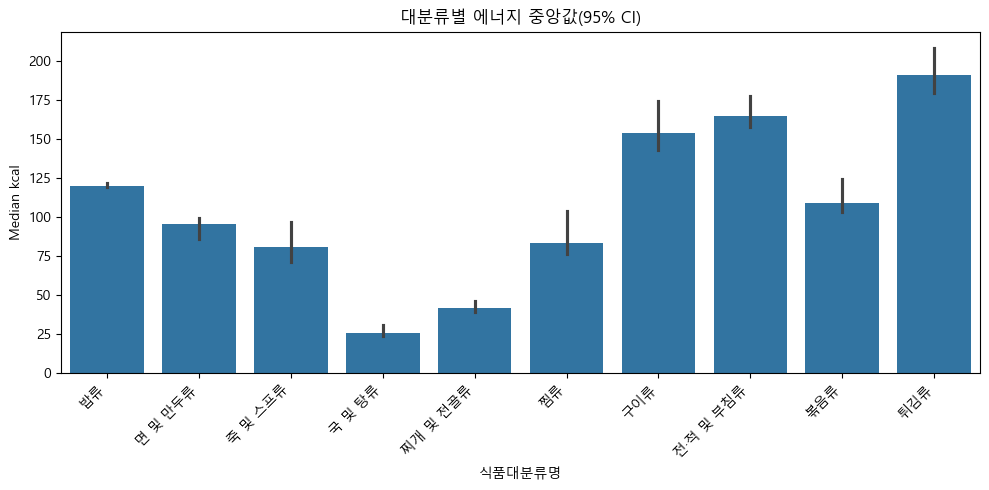

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_1, x="식품대분류명", y="에너지(kcal)", estimator=np.median)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Median kcal")
plt.title("대분류별 에너지 중앙값(95% CI)")
plt.tight_layout(); plt.show()

In [29]:
### **4. 영양소 간 상관관계**